var: ddt_temp_radlw 
var: ddt_temp_radsw 
var: ddt_temp_radlw 
var: ddt_temp_radsw 
var: ddt_temp_radlw 
var: ddt_temp_radsw 
var: ddt_temp_radlw 
var: ddt_temp_radsw 


Text(0, 0.5, 'z [km]')

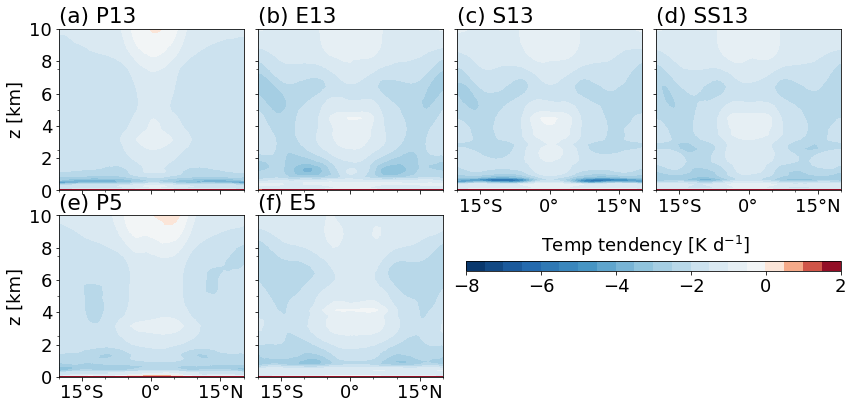

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pickle
from matplotlib.ticker import MultipleLocator
from matplotlib.colors import TwoSlopeNorm
%matplotlib inline
import sys
sys.path.append('../processing-icon/scripts')
from rad_vars_reg import find_temp_tendency

fs=18
plt.rcParams.update({'font.size': fs})

flists=['param', 'explicit', 'shallow','stochastic_shallow', 'P5', 'E5']
labels=['(a) P13', '(b) E13', '(c) S13', '(d) SS13', '(e) P5', '(f) E5']

z_ifc = xr.open_dataset('/project/meteo/w2w/B6/Hyunju/z_ifc.nc')['z_ifc']
z_full = 0.5*(z_ifc[1:].values + z_ifc[:-1])
z_full = z_full.rename({'height_2': 'height'})
divnorm = TwoSlopeNorm(vmin=-8, vcenter=0, vmax=2)

fig, axs = plt.subplots(2,4,figsize=(13,7), sharey=True)
axs = axs.flat
plt.subplots_adjust(top=0.82, left=0.065, right=0.90, bottom=0.13, wspace=0.08, hspace=0.155)

axs[0].set_yticks([0,5,10])
axs[0].yaxis.set_minor_locator(MultipleLocator(2.5))
axs[0].set_ylabel('z [km]')
axs[4].set_ylabel('z [km]')

cflev = np.linspace(-8, 2, 21)
for i, od in enumerate(flists):
    ofiles=glob.glob("data/%s/obs_DOM01_ML_reg_*_timeavg.nc" % od)

    ds = xr.open_mfdataset(ofiles)
    height_min = ds.height.min().values 
    z_full = z_full.sel(height= slice(height_min, 90))
    
    ds = find_temp_tendency(ds, 'data/%s' % od)
    
    radlw_3d=ds.ddt_temp_radlw
    radsw_3d=ds.ddt_temp_radsw
    
    rad_tot=radlw_3d + radsw_3d
    rad_tot=rad_tot.sel(height=slice(height_min, 90))
    
    im=axs[i].contourf(radlw_3d.lat, z_full*0.001, rad_tot.mean('lon')[0,...]*86400., cmap='RdBu_r',
                      levels=cflev, norm=divnorm)

#axs[0].set_yticks([0,5,10])
axs[0].set_yticks([0,2,4,6,8,10])

axs[-1].remove()
axs[-2].remove()

xthicks = ['15\u00b0S','0\u00b0','15\u00b0N']
for i in range(6):
    axs[i].set_ylim(0,10)#13)
    axs[i].set_xlim(-20.,20)
    axs[i].set_xticks([-15,0,15])
    axs[i].set_xticklabels(xthicks)
    axs[i].xaxis.set_minor_locator(MultipleLocator(5))
    axs[i].set_title(labels[i], loc='left')

axs[0].set_xticklabels([])
axs[1].set_xticklabels([])

cbaxes = fig.add_axes([0.5, 0.34, 0.4, 0.02])
cb=fig.colorbar(im, cax = cbaxes, ticks=cflev[::4], orientation='horizontal')
fig.text(0.58, 0.39, 'Temp tendency [K d'+r'$^{-1}$'+']', va='center')
#fig.text(0.97, 0.1, , rotation='vertical')

axs[0].set_ylabel('z [km]')